In [28]:
### Imports
from OVRImplementation import * 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.datasets import load_wine

In [23]:
data = load_wine()
X = data.data
y = data.target
features = data.feature_names

df = pd.DataFrame(X, columns=features)
df['target'] = y

df.head(20)



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


target
1    71
0    59
2    48
Name: count, dtype: int64


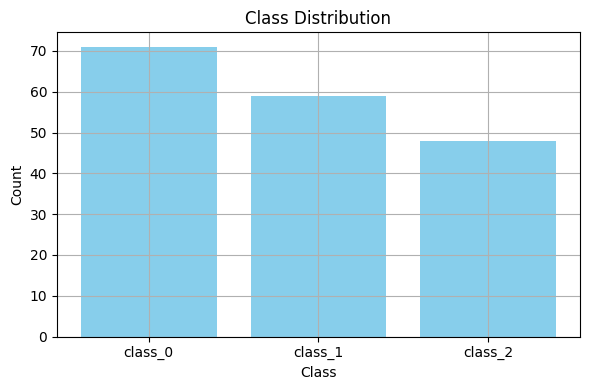

In [24]:
class_counts = df['target'].value_counts()
print(class_counts)
class_labels = data.target_names

plt.figure(figsize=(6, 4))
plt.bar(class_labels, class_counts, color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid()
plt.tight_layout()
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

Perceptron Accuracy: 0.861
Perceptron Precision (macro): 0.9
Perceptron Precision (micro): 0.861
Perceptron Recall (macro): 1.0
Perceptron Recall (micro): 0.861
Perceptron F1-score (macro): 0.948
Perceptron F1-score (micro): 0.861


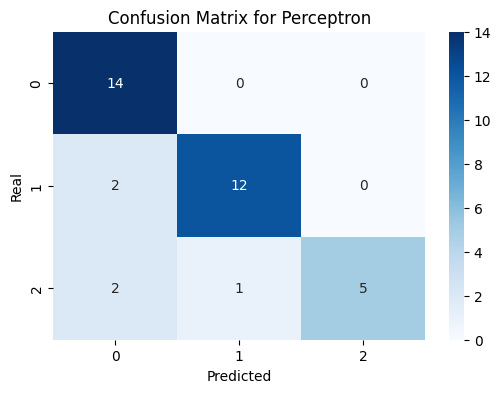

SVC Accuracy: 1.0
SVC Precision (macro): 1.0
SVC Precision (micro): 1.0
SVC Recall (macro): 1.0
SVC Recall (micro): 1.0
SVC F1-score (macro): 1.0
SVC F1-score (micro): 1.0


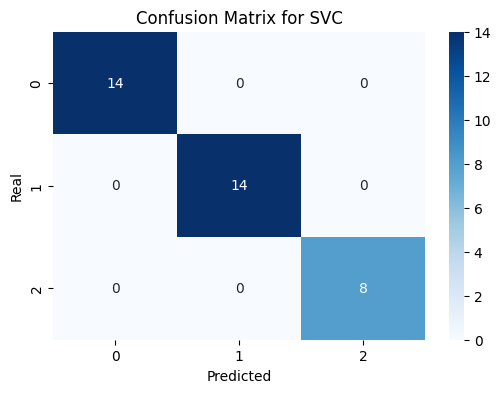

In [33]:
ovr_perceptron = OVRPerceptron(learning_rate=0.01, n_iter=1000)
ovr_perceptron.fit(X_train, y_train)
y_pred = ovr_perceptron.predict(X_test)

ovr_svc = OVRSVC(kernel='linear')
ovr_svc.fit(X_train, y_train)
y_pred_svc = ovr_svc.predict(X_test)

print("Perceptron Accuracy:", round(accuracy(y_test, y_pred),3))
print("Perceptron Precision (macro):", round(precision(y_test, y_pred, average='macro'),3))
print("Perceptron Precision (micro):", round(precision(y_test, y_pred, average='micro'),3))
print("Perceptron Recall (macro):", round(recall(y_test, y_pred, average='macro'),3))
print("Perceptron Recall (micro):", round(recall(y_test, y_pred, average='micro'),3))
print("Perceptron F1-score (macro):", round(f1_score(y_test, y_pred, average='macro'),3))
print("Perceptron F1-score (micro):", round(f1_score(y_test, y_pred, average='micro'),3))

plt.figure(figsize=(6, 4))
cm_perceptron = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predicted'])
sns.heatmap(cm_perceptron, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Perceptron')
plt.show()

print("SVC Accuracy:", round(accuracy(y_test, y_pred_svc),3))
print("SVC Precision (macro):", round(precision(y_test, y_pred_svc, average='macro'),3))
print("SVC Precision (micro):", round(precision(y_test, y_pred_svc, average='micro'),3))
print("SVC Recall (macro):", round(recall(y_test, y_pred_svc, average='macro'),3))
print("SVC Recall (micro):", round(recall(y_test, y_pred_svc, average='micro'),3))
print("SVC F1-score (macro):", round(f1_score(y_test, y_pred_svc, average='macro'),3))
print("SVC F1-score (micro):", round(f1_score(y_test, y_pred_svc, average='micro'),3))

plt.figure(figsize=(6, 4))
cm_svc = pd.crosstab(y_test, y_pred_svc, rownames=['Real'], colnames=['Predicted'])
sns.heatmap(cm_svc, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for SVC')
plt.show()